In [3]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("PM_MF_p_midle_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [4]:
data

['t_n103        41.9979 (34.9409, 45.5499) (35.7734, 45.9301) 10.1567 (Jnode 202)\n',
 't_n104        37.9254 (30.9387, 43.6473) (31.3850, 43.9694) 12.5844 (Jnode 201)\n',
 't_n105        36.5443 (29.7727, 42.1108) (30.2395, 42.4555) 12.2160 (Jnode 200)\n',
 't_n106        32.9832 (26.7977, 38.1841) (27.1216, 38.4289) 11.3074 (Jnode 199)\n',
 't_n107        31.9300 (25.9198, 37.0023) (26.2628, 37.2716) 11.0088 (Jnode 198)\n',
 't_n108        29.8321 (24.1797, 34.6701) (24.4548, 34.8843) 10.4296 (Jnode 197)\n',
 't_n109        17.6429 (13.9184, 21.1892) (13.9832, 21.2462)  7.2630 (Jnode 196)\n',
 't_n110        17.4593 (13.7681, 20.9780) (13.7986, 21.0042)  7.2055 (Jnode 195)\n',
 't_n111        16.9471 (13.3593, 20.3869) (13.3390, 20.3631)  7.0241 (Jnode 194)\n',
 't_n112        16.2448 (12.7907, 19.5726) (12.7900, 19.5719)  6.7818 (Jnode 193)\n',
 't_n113        15.5740 (12.2415, 18.7922) (12.2659, 18.8135)  6.5476 (Jnode 192)\n',
 't_n114        11.3954 ( 8.6682, 14.2094) ( 8.6313, 1

In [5]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [6]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [7]:
node_name

['t_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107',
 't_n108',
 't_n109',
 't_n110',
 't_n111',
 't_n112',
 't_n113',
 't_n114',
 't_n115',
 't_n116',
 't_n117',
 't_n118',
 't_n119',
 't_n120',
 't_n121',
 't_n122',
 't_n123',
 't_n124',
 't_n125',
 't_n126',
 't_n127',
 't_n128',
 't_n129',
 't_n130',
 't_n131',
 't_n132',
 't_n133',
 't_n134',
 't_n135',
 't_n136',
 't_n137',
 't_n138',
 't_n139',
 't_n140',
 't_n141',
 't_n142',
 't_n143',
 't_n144',
 't_n145',
 't_n146',
 't_n147',
 't_n148',
 't_n149',
 't_n150',
 't_n151',
 't_n152',
 't_n153',
 't_n154',
 't_n155',
 't_n156',
 't_n157',
 't_n158',
 't_n159',
 't_n160',
 't_n161',
 't_n162',
 't_n163',
 't_n164',
 't_n165',
 't_n166',
 't_n167',
 't_n168',
 't_n169',
 't_n170',
 't_n171',
 't_n172',
 't_n173',
 't_n174',
 't_n175',
 't_n176',
 't_n177',
 't_n178',
 't_n179',
 't_n180',
 't_n181',
 't_n182',
 't_n183',
 't_n184',
 't_n185',
 't_n186',
 't_n187',
 't_n188',
 't_n189',
 't_n190',
 't_n191',
 't_n192',
 't_n193',

In [8]:
posterior_mean_iqtree

[41.9979,
 37.9254,
 36.5443,
 32.9832,
 31.93,
 29.8321,
 17.6429,
 17.4593,
 16.9471,
 16.2448,
 15.574,
 11.3954,
 3.538,
 8.5204,
 6.8631,
 12.3144,
 10.1721,
 16.1907,
 15.5148,
 9.1002,
 12.4285,
 10.3586,
 10.8379,
 15.2866,
 14.2001,
 4.2944,
 16.7029,
 14.9903,
 10.8928,
 9.97,
 8.3759,
 11.8155,
 9.3888,
 8.5329,
 28.3862,
 22.5259,
 30.2853,
 27.4354,
 25.0637,
 19.9212,
 17.1301,
 15.144,
 12.5156,
 20.7432,
 11.3291,
 25.1827,
 23.045,
 6.6419,
 3.0353,
 33.895,
 29.8365,
 24.5983,
 18.7643,
 20.5177,
 31.5569,
 27.3649,
 27.9923,
 36.715,
 34.3423,
 30.4012,
 11.2737,
 30.882,
 28.8296,
 24.4921,
 21.4217,
 16.8207,
 30.6444,
 20.3929,
 19.3878,
 18.6396,
 17.5537,
 15.8552,
 15.2055,
 14.4672,
 13.5978,
 12.466,
 11.3126,
 9.7697,
 6.7536,
 12.5688,
 11.1306,
 9.7585,
 13.7009,
 12.3324,
 11.6161,
 9.2799,
 10.2154,
 12.1293,
 10.558,
 8.8147,
 14.9788,
 13.0198,
 14.1649,
 13.204,
 11.6528,
 8.5014,
 8.4204,
 6.6076,
 2.3678,
 19.8773,
 16.6573]

In [9]:
lower_ci_iqtree

[]

In [10]:
upper_ci_iqtree

[]

In [11]:
file_LG = open("LG_G4_PM_codeml_middle_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [13]:
posterior_mean_baseml

[40.1531,
 31.6516,
 30.3918,
 28.0769,
 27.3165,
 26.0648,
 14.2132,
 14.1316,
 13.8139,
 13.1884,
 12.6567,
 9.7255,
 2.4368,
 6.9033,
 4.9004,
 9.5972,
 8.3134,
 13.1631,
 12.6484,
 6.7772,
 9.9598,
 8.1908,
 8.5235,
 12.2886,
 11.4646,
 3.6529,
 13.3139,
 12.0928,
 8.2141,
 7.3521,
 5.8271,
 9.6862,
 7.7153,
 4.8985,
 24.3758,
 21.0249,
 25.9066,
 23.7658,
 22.0359,
 18.2641,
 15.7953,
 14.0417,
 11.7728,
 18.6086,
 11.1906,
 22.1485,
 20.1025,
 5.4767,
 2.4397,
 28.0524,
 25.015,
 21.3785,
 17.0677,
 17.7759,
 26.4047,
 23.3996,
 24.0447,
 30.6757,
 28.8066,
 25.3461,
 11.3574,
 26.0694,
 24.1977,
 21.3046,
 18.5327,
 16.3599,
 26.2955,
 17.1817,
 16.3453,
 15.7691,
 15.418,
 14.0035,
 13.3914,
 12.9282,
 12.1439,
 11.2286,
 10.2815,
 8.916,
 6.4489,
 11.1303,
 10.1989,
 9.2243,
 12.3731,
 11.133,
 10.4031,
 8.5406,
 9.3631,
 11.0065,
 9.6819,
 8.0317,
 13.2682,
 11.6328,
 12.5821,
 11.5916,
 10.3621,
 7.7388,
 7.5596,
 4.7174,
 1.7087,
 16.178,
 14.1026]

In [14]:
posterior_mean_iqtree

[41.9979,
 37.9254,
 36.5443,
 32.9832,
 31.93,
 29.8321,
 17.6429,
 17.4593,
 16.9471,
 16.2448,
 15.574,
 11.3954,
 3.538,
 8.5204,
 6.8631,
 12.3144,
 10.1721,
 16.1907,
 15.5148,
 9.1002,
 12.4285,
 10.3586,
 10.8379,
 15.2866,
 14.2001,
 4.2944,
 16.7029,
 14.9903,
 10.8928,
 9.97,
 8.3759,
 11.8155,
 9.3888,
 8.5329,
 28.3862,
 22.5259,
 30.2853,
 27.4354,
 25.0637,
 19.9212,
 17.1301,
 15.144,
 12.5156,
 20.7432,
 11.3291,
 25.1827,
 23.045,
 6.6419,
 3.0353,
 33.895,
 29.8365,
 24.5983,
 18.7643,
 20.5177,
 31.5569,
 27.3649,
 27.9923,
 36.715,
 34.3423,
 30.4012,
 11.2737,
 30.882,
 28.8296,
 24.4921,
 21.4217,
 16.8207,
 30.6444,
 20.3929,
 19.3878,
 18.6396,
 17.5537,
 15.8552,
 15.2055,
 14.4672,
 13.5978,
 12.466,
 11.3126,
 9.7697,
 6.7536,
 12.5688,
 11.1306,
 9.7585,
 13.7009,
 12.3324,
 11.6161,
 9.2799,
 10.2154,
 12.1293,
 10.558,
 8.8147,
 14.9788,
 13.0198,
 14.1649,
 13.204,
 11.6528,
 8.5014,
 8.4204,
 6.6076,
 2.3678,
 19.8773,
 16.6573]

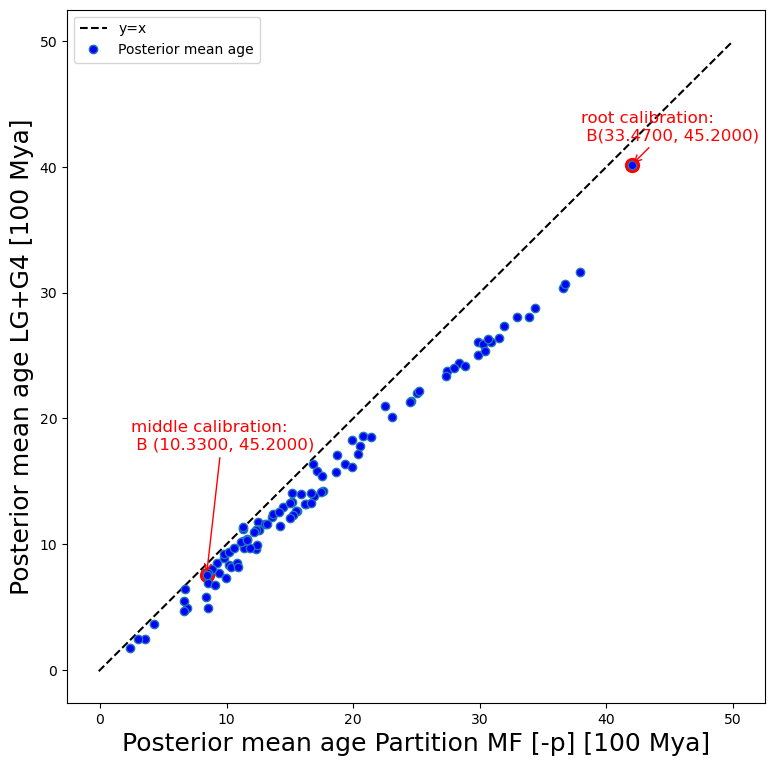

In [37]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,50], 
        [-0.1, 50], 
        'k--', label='y=x')
# ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

points = ax.plot(posterior_mean_iqtree, posterior_mean_baseml, 'o', label='Posterior mean age')

# points[0].set_edgecolor('red')  # Change edge color if needed
points[0].set_markerfacecolor('blue')
# points[23].set_markerfacecolor('blue')# Set default face color (for other points)

# Now plot the highlighted point with a different color
ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', s=100)
ax.scatter(posterior_mean_iqtree[-5], posterior_mean_baseml[-5], color='red', s=100)
# ax.scatter(posterior_mean_iqtree[0], posterior_mean_baseml[0], color='red', label='Root age')
ax.annotate('root calibration:\n B(33.4700, 45.2000)', 
        xy=(posterior_mean_iqtree[0], posterior_mean_baseml[0]), 
        xytext=(posterior_mean_iqtree[0] -4,  posterior_mean_baseml[0] + 2),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
ax.annotate('middle calibration:\n B (10.3300, 45.2000)', 
        xy=(posterior_mean_iqtree[-5], posterior_mean_baseml[-5]), 
        xytext=(posterior_mean_iqtree[-5] -6,  posterior_mean_baseml[-5] + 10),  # Offset position for the label
        arrowprops=dict(arrowstyle='->', color='red'),  # Arrow style
        fontsize=12, color='red') 
# Labels and title
ax.set_xlabel('Posterior mean age Partition MF [-p] [100 Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)

# ax.set_title('Posterior mean age comparison between LG and Partition MF [-p] [t199 ~ B(10.3300,45.2000)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./animal_origin_posterior_mean_age_comparison_partition_MF_p_middle_scatter.png')

In [16]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')